# Missingness
- A problem that is both common and insidious

### Diagnosis: 
- How many rows are missing at least one value?
- What fraction of columns/features are missing values?
- Is there any pattern to the missing values? (What is the missigness regime?)
 - a missingness indicator for each feature with missing values, and run pairwise correlations against other featuresin the dataset. 
 - Pearson correlation strength of model features with count of the number of missing values per observation.

#### Looking at some auxiliary features
- not expecting to use frac year in the model, but it can be used to test missingness regime

 ### Remedy:
- Use modern multiple imputation technique

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

# custom tools
import sys
sys.path.insert(1, '../scripts/')
# import eda_tools as et
# import data_munging_tools as dmt
import model_fitting_tools as mft

In [37]:
full_df =  pd.read_csv("../data/full_df.tsv", sep="\t", index_col="api")

In [3]:
def count_missings(df):
    percent_missing_df = (df.isnull().sum() / full_df.shape[0] * 100).round(2).to_frame().rename(columns={0: "percent_missing"})
    return percent_missing_df

In [4]:
percent_missing_df = count_missings(full_df)
percent_missing_df

,percent_missing
bakken_isopach_ft,0.00
bh_lat,0.00
bh_lng,0.00
choke_size,19.94
data_group,0.00
legs,0.00
mean_tvd,0.00
min_tvd,0.00
production_liquid_180,0.00
std_tvd,0.00


In [5]:
percent_missing_df = count_missings(full_df.query("spud_year > 2009"))
percent_missing_df

,percent_missing
bakken_isopach_ft,0.00
bh_lat,0.00
bh_lng,0.00
choke_size,14.92
data_group,0.00
legs,0.00
mean_tvd,0.00
min_tvd,0.00
production_liquid_180,0.00
std_tvd,0.00


In [6]:
#TODO this is a problem. haversine is not working properly for about 5% of observations
full_df.query("length != length").shape

(383, 22)

In [7]:
full_df.shape

(7502, 22)

In [8]:
full_df.drop("choke_size", axis=1).dropna().shape

(5915, 21)

In [9]:
full_df.drop("choke_size", axis=1).query("spud_year > 2009").dropna().shape

(5831, 21)

In [10]:
later_df = full_df.copy().drop("choke_size", axis=1).query("spud_year > 2009")

In [11]:
later_df.shape

(6518, 21)

In [12]:
missing_fluid = set(later_df.query("total_volume_bbls != total_volume_bbls").index.values)

missing_proppant = set(later_df.query("total_lbs_proppant!= total_lbs_proppant").index.values)

print(
    len(missing_fluid.union(missing_proppant)),
    len(missing_fluid.intersection(missing_proppant)),
    len(missing_fluid - missing_proppant),
    len(missing_proppant - missing_fluid)
     )

353 108 159 86


In [14]:
later_df.isnull().sum()

bakken_isopach_ft          0
bh_lat                     0
bh_lng                     0
data_group                 0
legs                       0
mean_tvd                   0
min_tvd                    0
production_liquid_180      0
std_tvd                    0
surface_lat                0
surface_lng                0
td                         6
total_lbs_proppant       194
total_num_stages          34
total_volume_bbls        267
tvd                        0
length                   326
stage_spacing            358
spud_year                  0
shortest_dist              0
target_formation           7
dtype: int64

In [15]:
full_df.isnull().sum()

bakken_isopach_ft           0
bh_lat                      0
bh_lng                      0
choke_size               1496
data_group                  0
legs                        0
mean_tvd                    0
min_tvd                     0
production_liquid_180       0
std_tvd                     0
surface_lat                 0
surface_lng                 0
td                          6
total_lbs_proppant       1064
total_num_stages          710
total_volume_bbls        1143
tvd                         0
length                    383
stage_spacing            1046
spud_year                  19
shortest_dist               0
target_formation           11
dtype: int64

In [16]:
full_df.columns.tolist()

['bakken_isopach_ft',
 'bh_lat',
 'bh_lng',
 'choke_size',
 'data_group',
 'legs',
 'mean_tvd',
 'min_tvd',
 'production_liquid_180',
 'std_tvd',
 'surface_lat',
 'surface_lng',
 'td',
 'total_lbs_proppant',
 'total_num_stages',
 'total_volume_bbls',
 'tvd',
 'length',
 'stage_spacing',
 'spud_year',
 'shortest_dist',
 'target_formation']

In [17]:
foi = ["std_tvd", 
       "tvd", 
       "total_lbs_proppant", 
       "total_volume_bbls", 
       "total_num_stages", 
       "spud_year", 
       "bh_lat", 
       "bh_lng", 
       "target_formation",
       "production_liquid_180"]

In [18]:
full_df[foi].isnull().sum() / full_df[foi].shape[0]

std_tvd                  0.000000
tvd                      0.000000
total_lbs_proppant       0.141829
total_volume_bbls        0.152359
total_num_stages         0.094641
spud_year                0.002533
bh_lat                   0.000000
bh_lng                   0.000000
target_formation         0.001466
production_liquid_180    0.000000
dtype: float64

In [19]:
null_count_df = full_df[foi].isnull().sum().to_frame().rename(columns={0: "null_count"})

In [20]:
null_count_df.query("null_count > 1").index.tolist()

['total_lbs_proppant',
 'total_volume_bbls',
 'total_num_stages',
 'spud_year',
 'target_formation']

In [21]:
null_flag_df = full_df.copy()

for col in foi:
    null_flag_df[col + "_isnull"] = null_flag_df[col].isnull()

In [22]:
completion_features = \
['total_lbs_proppant',
 'total_volume_bbls',
 'total_num_stages']

In [23]:
null_flag_corr_df = null_flag_df[["surface_lat", "surface_lng", "spud_year"] + [x + "_isnull" for x in completion_features]].corr()

In [24]:
null_flag_corr_df

,surface_lat,surface_lng,spud_year,total_lbs_proppant_isnull,total_volume_bbls_isnull,total_num_stages_isnull
surface_lat,1.000000,-0.126848,0.003178,0.006326,-0.002830,-0.040458
surface_lng,-0.126848,1.000000,-0.245711,0.265234,0.258472,0.187109
spud_year,0.003178,-0.245711,1.000000,-0.661677,-0.646359,-0.634365
total_lbs_proppant_isnull,0.006326,0.265234,-0.661677,1.000000,0.867450,0.762675
total_volume_bbls_isnull,-0.002830,0.258472,-0.646359,0.867450,1.000000,0.730929
total_num_stages_isnull,-0.040458,0.187109,-0.634365,0.762675,0.730929,1.000000


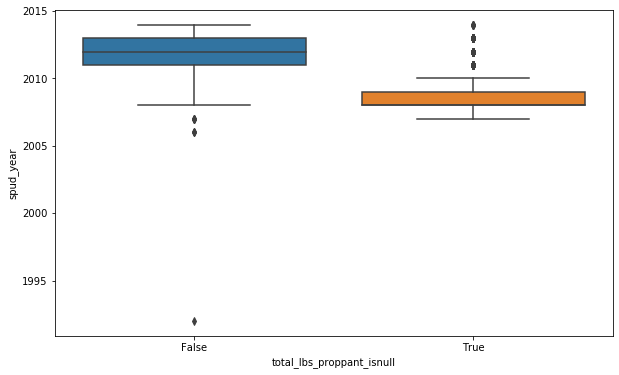

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=null_flag_df, y="spud_year", x="total_lbs_proppant_isnull")

In [26]:
null_flag_df.filter(["total_lbs_proppant_isnull", "spud_year"]).groupby("total_lbs_proppant_isnull").mean()

,spud_year
total_lbs_proppant_isnull,
False,2011.993457
True,2008.738722


In [27]:
vc = full_df.spud_year.value_counts().sort_index().to_frame().rename(columns={"spud_year": "value_counts"})

num_missing = (full_df.copy()
               .filter(["total_lbs_proppant", "total_volume_bbls", "spud_year"])
               .groupby("spud_year")
               .apply(lambda x: x.isnull().sum())
               .drop("spud_year", axis=1)
               .rename(columns={"total_lbs_proppant": "prop_num_missing",
                               "total_volume_bbls" : "fluid_num_missing"
                               })
               .join(vc)
               .assign(prop_perc_missing = lambda x: x["prop_num_missing"]/ x["value_counts"] * 100,
                       fluid_perc_missing = lambda x: x["fluid_num_missing"]/ x["value_counts"] * 100,
                      )
              )

num_missing

,prop_num_missing,fluid_num_missing,value_counts,prop_perc_missing,fluid_perc_missing
spud_year,,,,,
1992.0,0,0,1,0.000000,0.000000
2006.0,0,0,3,0.000000,0.000000
2007.0,156,156,161,96.894410,96.894410
2008.0,409,409,433,94.457275,94.457275
2009.0,305,310,367,83.106267,84.468665
2010.0,77,93,848,9.080189,10.966981
2011.0,33,44,1274,2.590267,3.453689
2012.0,43,84,1846,2.329361,4.550379
2013.0,34,40,1966,1.729400,2.034588


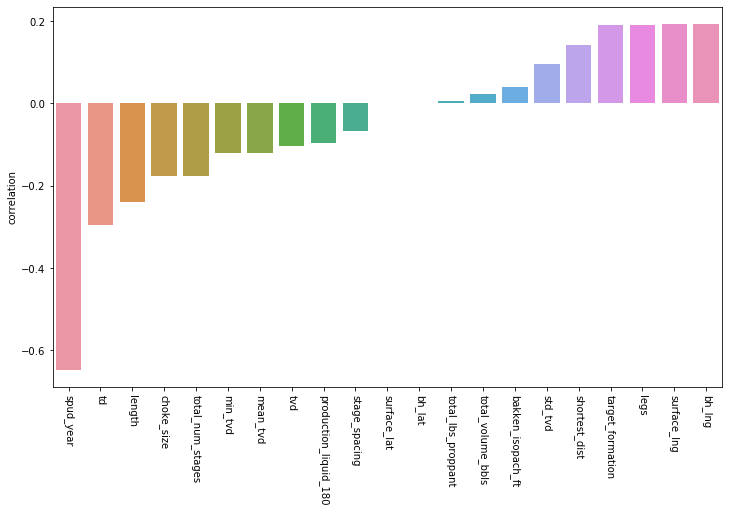

In [28]:
has_nulls_df = full_df.copy().assign(has_nulls= lambda x: pd.isnull(x).sum(axis=1))
correlations = has_nulls_df.corr().sort_values('has_nulls')[['has_nulls']]
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(x='index', y='has_nulls', 
                 data=correlations.dropna().drop('has_nulls', axis=0).reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
ax.set_xlabel('')
ax.set_ylabel('correlation')
plt.show()

### FROM SciKit Docs

In [62]:
# To use this experimental feature, we need to explicitly ask for it:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [33]:
# approx 19% of rows have more than one missing_value
full_df.isnull().sum(axis=1).to_frame().reset_index().rename(columns={0: "count"}).query("count > 1").shape[0] / full_df.shape[0] * 100

18.621700879765395

In [43]:
test_df = (full_df.copy()
     .drop(["choke_size", "data_group"], axis=1)
     .query("spud_year > 2009")
     .dropna()
)

In [44]:
test_df.isnull().sum()

bakken_isopach_ft        0
bh_lat                   0
bh_lng                   0
legs                     0
mean_tvd                 0
min_tvd                  0
production_liquid_180    0
std_tvd                  0
surface_lat              0
surface_lng              0
td                       0
total_lbs_proppant       0
total_num_stages         0
total_volume_bbls        0
tvd                      0
length                   0
stage_spacing            0
spud_year                0
shortest_dist            0
target_formation         0
dtype: int64

In [ ]:
import model_fitting_tools as mft

In [48]:
target_col = "production_liquid_180"

In [53]:
X_full, y_full = mft.X_y_split(test_df, target=target_col)

In [54]:
X_full = X_full.values

In [55]:
X_full.shape

(5831, 19)

In [63]:
N_SPLITS = 10

rng = np.random.RandomState(0)

# X_full, y_full = fetch_california_housing(return_X_y=True)
# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
# X_full = X_full[::10]
# y_full = y_full[::10]
n_samples, n_features = X_full.shape

# Estimate the score on the entire dataset, with no missing values
br_estimator = BayesianRidge()
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    columns=['Full Data']
)

# Add a single missing value to each row
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing[missing_samples, missing_features] = np.nan

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )

/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [I

In [66]:
scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer],
    keys=['Original', 'SimpleImputer', 'IterativeImputer'], axis=1
)

In [67]:
scores

Original SimpleImputer               IterativeImputer  \
      Full Data          mean        median    BayesianRidge   
0 -6.333849e+08 -6.491465e+08 -6.497013e+08    -6.323599e+08   
1 -6.119954e+08 -6.254598e+08 -6.246371e+08    -6.204330e+08   
2 -6.540959e+08 -7.048119e+08 -7.043376e+08    -6.748148e+08   
3 -7.462266e+08 -7.607987e+08 -7.623926e+08    -7.521055e+08   
4 -6.228117e+08 -6.197352e+08 -6.217150e+08    -6.205338e+08   
5 -5.788534e+08 -5.705576e+08 -5.710469e+08    -5.810321e+08   
6 -6.143262e+08 -6.378366e+08 -6.395381e+08    -6.179797e+08   
7 -6.100398e+08 -6.288395e+08 -6.282028e+08    -6.120951e+08   
8 -6.389456e+08 -6.507717e+08 -6.531347e+08    -6.402531e+08   
9 -6.981712e+08 -7.051659e+08 -7.050899e+08    -7.033068e+08   

                                                                 
  DecisionTreeRegressor ExtraTreesRegressor KNeighborsRegressor  
0         -6.426553e+08       -6.314358e+08       -6.436333e+08  
1         -6.176799e+08       -6.140274e+08       -6.202034e+08  
2         -6.551346e+08       -6.539265e+08       -6.994255e+08  
3         -7.515202e+08       -7.414826e+08       -7.574154e+08  
4         -6.235290e+08       -6.261157e+08       -6.177839e+08  
5         -5.839220e+08       -5.837941e+08       -5.760188e+08  
6         -6.191539e+08       -6.141551e+08       -6.272009e+08  
7         -6.164056e+08       -6.104440e+08       -6.257027e+08  
8         -6.404416e+08       -6.399484e+08       -6.461679e+08  
9         -7.168775e+08       -7.007752e+08       -7.034152e+08

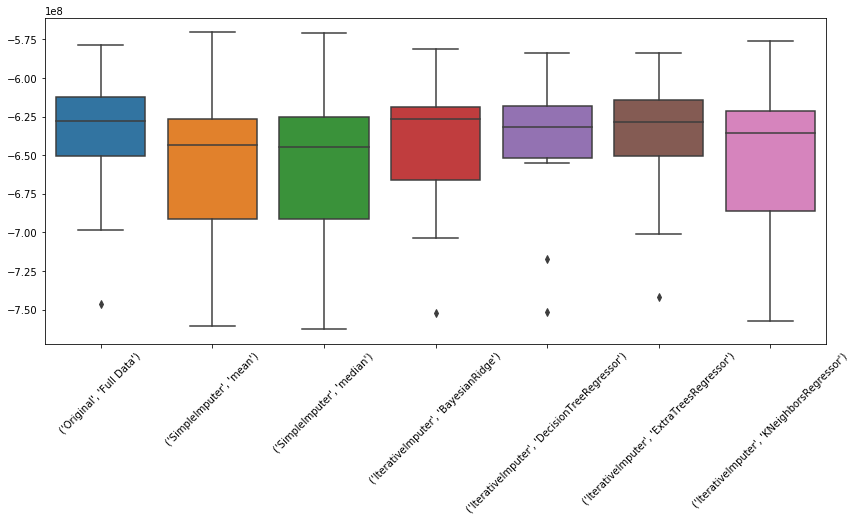

In [70]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=scores)
for item in ax.get_xticklabels():
        item.set_rotation(45)

In [135]:
# examine them for
# patterns of missingness. A common approach is to build
